# Regularization parameter: Lasso

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [1]:
#Imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')


In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [16]:
lass = linear_model.Lasso(alpha=0.1)
lass.fit(X_train2, Y_train)
print(lass.score(X_test2, Y_test))

0.55467279272


In [36]:
#Plot R for different alpha values.
lasso_r={}
ridge_r={}
lambd_list=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27]
for lambd in lambd_list:
    #Lasso Training
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X_train2, Y_train)
    lasso_r[lambd]=lass.score(X_test2, Y_test)
    
    #Ridge Training
    ridge = linear_model.Ridge(alpha=lambd)
    ridge.fit(X_train2, Y_train)
    ridge_r[lambd]=ridge.score(X_test2, Y_test)


In [37]:
data = pd.DataFrame([lasso_r,ridge_r]).transpose()
data.columns=['lasso_r','ridge_r']
data.head(10)

,lasso_r,ridge_r
0.1,0.554673,0.563000
0.2,0.524355,0.563000
0.3,0.472263,0.563000
0.4,0.398386,0.563001
0.5,0.302733,0.563001
0.6,0.185291,0.563001
0.7,0.046088,0.563002
0.8,0.019253,0.563002
1.0,0.019253,0.563003
2.0,0.019255,0.563006


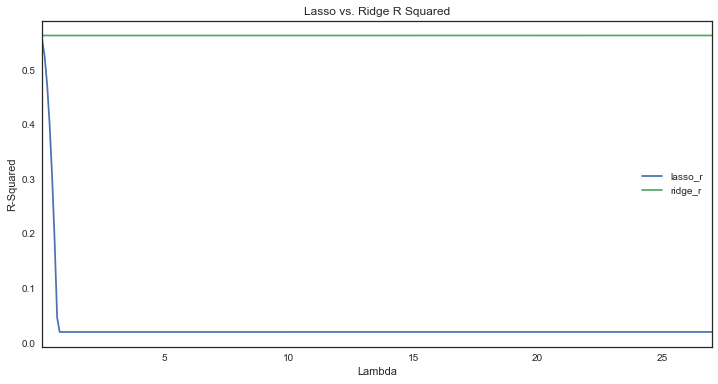

In [38]:
data.plot(figsize=(12,6))
plt.ylabel("R-Squared")
plt.xlabel("Lambda")
plt.title('Lasso vs. Ridge R Squared')

### Write Up

It looks like the alpha value affects the Lasso regression more than the Ridge. It has no effect on the Ridge regression.